In [1]:
# NERDYNE A.I. Experiments 2018+
# This code is a modification from https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection
# and comes with no warranty. Modifications and original elements are licensed as: MIT LICENSE
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING 
# BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. 
# IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, 
# WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE 
# OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [2]:
#import Libraries
import numpy as np
import cv2
import time
import matplotlib.pyplot
%matplotlib inline

In [3]:
# train classifier using pre-built faces from OpenCV
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
# Video Capture
cap = cv2.VideoCapture(0)

# 320 x 240 video
ret = cap.set(3,820) 
ret = cap.set(4,640)

# array to hold the identified faces
cropped = []
crop = False

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:

        # capture current frame
        img = frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces and get (x,y,w,h) location on the image
        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        # loop over all faces:
        # 1 - create a blue frame in img
        # 2 - crop each face and store them im cropped array
        for (x,y,w,h) in faces:
            frame = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            if crop:
                cropped.append(img[y:y+h, x:x+w])
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

        cv2.imshow('frame',frame)
        
        
        # press q to quit
        if cv2.waitKey(1) & 0xFF == ord('s'):
            crop = True
            
        # press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

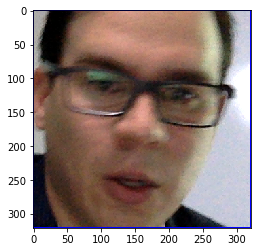

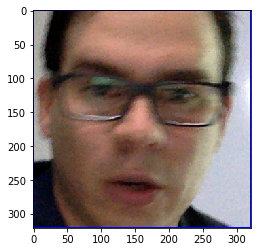

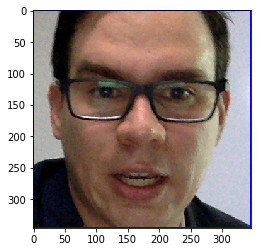

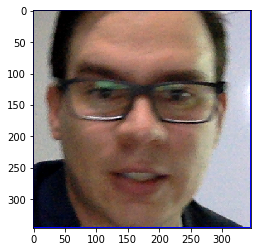

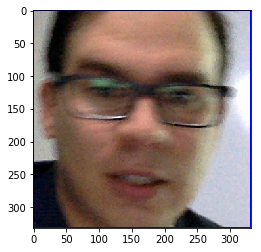

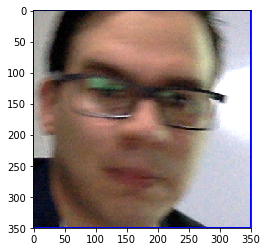

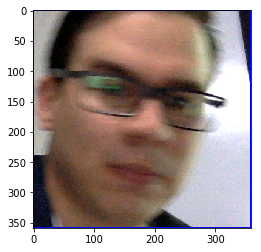

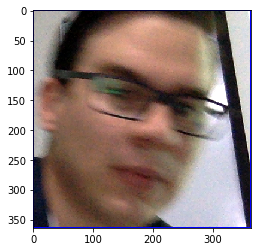

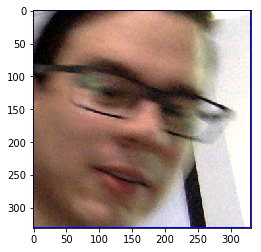

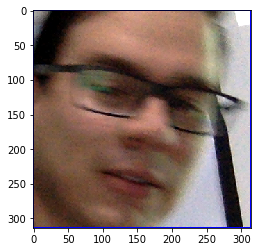

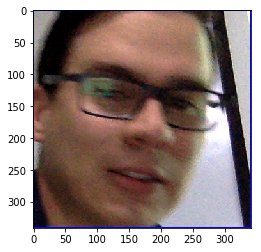

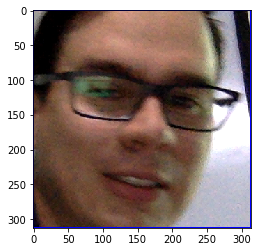

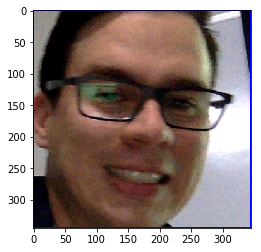

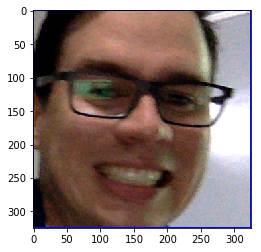

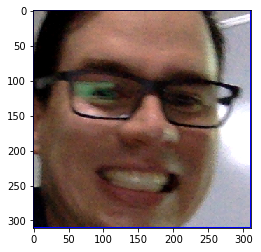

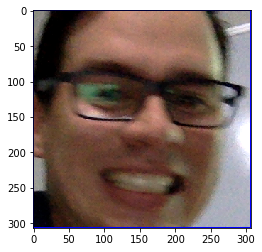

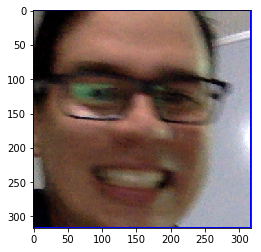

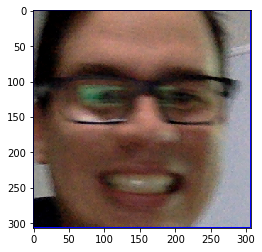

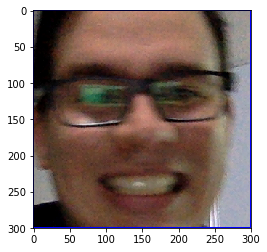

In [5]:
# loop over all cropped faces to check each one individually.
for face_crop in cropped[1:20]:
    matplotlib.pyplot.figure()
    matplotlib.pyplot.imshow(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))